In [1]:
from nn import nn, preprocess, io

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# MNIST Autoencoder

In [3]:
# instantiate NN
layers_ae = [{'input_dim': 64, 'output_dim': 16, 'activation': 'sigmoid'}, 
          {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]
epochs = 10
ae = nn.NeuralNetwork(layers_ae, lr = 0.01, seed = 0, batch_size = 10, epochs = epochs, loss_function = "MSE")

In [4]:
# load data
digits = load_digits()
X = digits['data']
y = digits['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
# fit
train_loss, val_loss = ae.fit(X_train, X_train, X_test, X_test)

Epoch 0
Epoch 5


Text(0.5, 1.0, 'Validation loss')

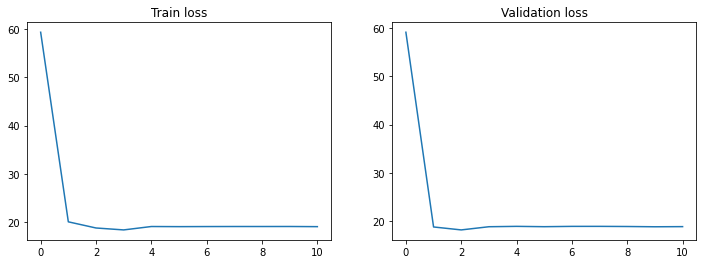

In [6]:
# plot losses
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(range(epochs+1), train_loss)
axs[0].set_title('Train loss')
axs[1].plot(range(epochs+1), val_loss)
axs[1].set_title('Validation loss')

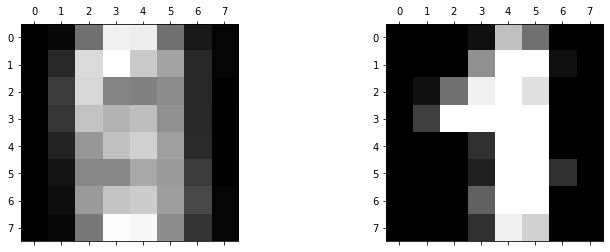

In [7]:
# visualize performance
out = ae.predict(X_train)
fig, axs = plt.subplots(1, 2, figsize=(12,4))
plt.gray()
axs[0].matshow(out[0].reshape((8,8)))
axs[1].matshow(X_train[0].reshape((8,8)))

^ wow that's pretty bad

In [8]:
# Quantify reconstruction performance
ae._mean_squared_error(out, X_train)

18.97876189723451

I chose MSE loss becuase this task involves predicting the numeric, continuous brightness of pixels, rather than binary classfication. Likewise, a relu output layer lends itself more to predicting a continuous numeric variable than sigmoid does. However, I found that a sigmoid hidden layer outperformed a relu hidden layer in terms of the loss on the validation data after an equal number of epochs. Batch size, learning rate, and epoch number were also optimized with a brief search. 

# Transcription Factor Classifier

In [9]:
positives = io.read_text_file("./data/rap1-lieb-positives.txt")
negatives = io.read_fasta_file("./data/yeast-upstream-1k-negative.fa")

In [10]:
# split the negative sequences into 17-mers
target_length = len(positives[0])
negatives_split = []
for seq in negatives:
    split = []
    for i in range(int(len(seq)/target_length)):
        split.append(seq[i*target_length:(i+1)*target_length])
    negatives_split += split

In [11]:
X = positives + negatives_split
y = np.concatenate([np.ones(len(positives)), np.zeros(len(negatives_split))]).tolist()

In [12]:
X, y = preprocess.sample_seqs(X, y)

In [13]:
X = preprocess.one_hot_encode_seqs(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [16]:
layers_clf = [{'input_dim': 68, 'output_dim': 34, 'activation': 'relu'},
              {'input_dim': 34, 'output_dim': 1, 'activation': 'sigmoid'},]
epochs = 10
clf = nn.NeuralNetwork(layers_clf, lr = 0.01, seed = 0, batch_size = 1000, epochs = epochs, loss_function = "BCE")

In [17]:
train_loss, val_loss = clf.fit(X_train, y_train, X_test, y_test)

Epoch 0


/Users/thomasmazumder/Documents/bmi203/project7/nn/nn.py:357: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


Epoch 5


Text(0.5, 1.0, 'Validation loss')

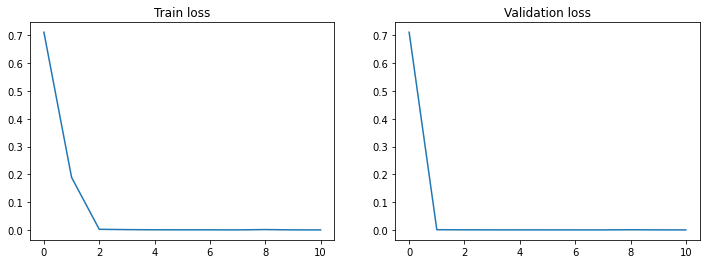

In [19]:
# plot losses
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(range(epochs+1), train_loss)
axs[0].set_title('Train loss')
axs[1].plot(range(epochs+1), val_loss)
axs[1].set_title('Validation loss')

In [22]:
val_pred = clf.predict(X_test)

In [27]:
val_pred = clf.predict(X_test)
print(f'Validation accuracy: {np.sum(np.isclose(val_pred.flatten(), y_test))/len(y_test)}')

Validation accuracy: 0.9125866900319896


I chose BCE loss because BCE is well-suited to binary classification. I chose a sigmoid activation for the output layer because sigmoids are well-suited to predicting a binary label. I used two layers in total because the performance seemed pretty satisfactory. Likewise, the learning rate and number of epochs were set at 0.01 and 1000, respectively, because the loss and accuracy at these hyperparameters seemed acceptable.